# VGG11

In [1]:
from torch import optim
from src.training import Training
from src.evaluation import Evaluation
from models.vgg.vgg11 import VGG11

## Model

In [2]:
# declare model details
model_params = {
    'img_size': 32,
    'img_channel': 1,
    'n_classes': 10
}
model_ptt = VGG11

## Optimizer

In [3]:
# declare optimizer details
optimizer_params = {
    'lr': 1e-2,
    'momentum': 0.5
}
optimizer_ptt = optim.SGD

## Scheduler

In [4]:
scheduler_params = None
scheduler_ptt = None

## Training

In [5]:
# initialize learning process
data_dir = r'data/final'
train_ratio = 0.9
interpolate = 32
ckpt_dir = r'checkpoints/vgg/vgg11'
from_ckpt = False

training = Training(data_dir=data_dir, train_ratio=train_ratio, 
                    interpolate=interpolate, ckpt_dir=ckpt_dir, from_ckpt=from_ckpt,
                    model_ptt=model_ptt, model_params=model_params,
                    optimizer_ptt=optimizer_ptt, optimizer_params=optimizer_params,
                    scheduler_ptt=scheduler_ptt, scheduler_params=scheduler_params)
training.model.get_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]             640
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          73,856
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         295,168
      BatchNorm2d-10            [-1, 256, 8, 8]             512
             ReLU-11            [-1, 256, 8, 8]               0
           Conv2d-12            [-1, 256, 8, 8]         590,080
      BatchNorm2d-13            [-1, 256, 8, 8]             512
             ReLU-14            [-1, 25

In [6]:
# start learning
epochs = 100
save_every = 0
batch_sizes = [128, 256]
train_history = training.train(epochs=epochs, save_every=save_every,
                               batch_sizes=batch_sizes)

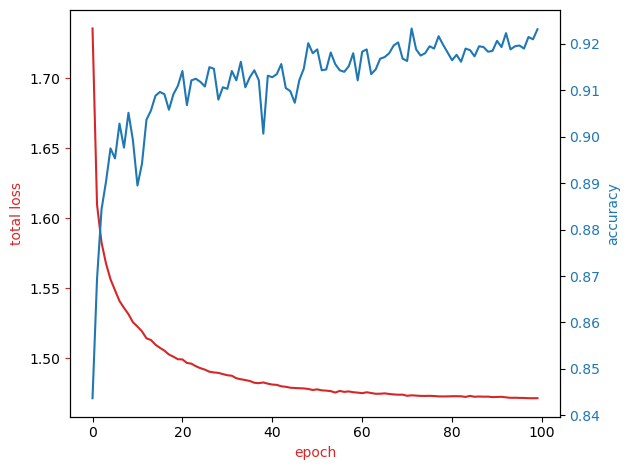

In [7]:
# plot training loss and validation accuracy
training.plot_results()

## Evaluation

Accuray: 0.9193
f1-score: 0.9189222674747223


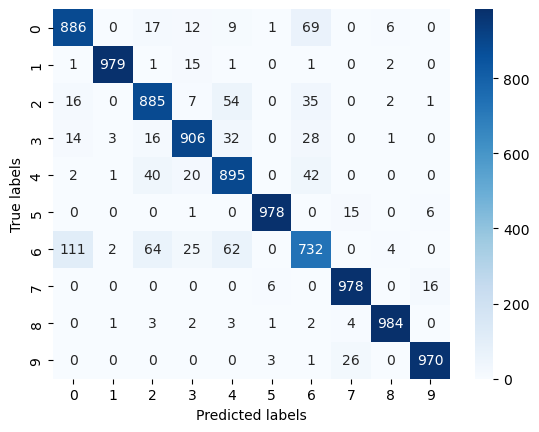

In [8]:
# evaluate model through accuracy, f1-score and confusion matrix
model = training.model
evaluation = Evaluation(data_dir=data_dir, interpolate=interpolate, model=model)
evaluation.evaluate()
evaluation.plot_results()